# This is to showcase how the model works (where the model looks) to predict the data 4

### Imports

In [1]:
import sys
import os
import cv2
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import shap

current_dir = os.getcwd()

# Define the project root relative to the current working directory
project_root = os.path.abspath(os.path.join(current_dir, "../"))  # Adjust this based on your folder structure

# Add project_root to sys.path
sys.path.append(project_root)

from src.models.explainability import GradCAM, SaliencyMap, IntegratedGradients, GradCAMSuperimposed
from src.inference.explain import ExplainabilityContext

c:\Users\Geeneth\Desktop\Code\Machine Learning\PycharmProjects\Image Classification with Explainability\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the model
model = tf.keras.models.load_model("./saved_model/final_model.h5")

In [3]:
# Load CIFAR-10 dataset from the saved files
train_data = np.load('../data/processed/cifar10_train.npz')

x_train = train_data['x_train']
y_train = train_data['y_train']

In [4]:
image_path = "../data/raw/United_Airlines_Boeing_777-200_Meulemans.jpg"
img = cv2.imread(image_path)

In [5]:
resize = tf.image.resize(img, (32,32))

In [6]:
# Load and preprocess image
image = np.expand_dims(resize / 255, 0)

### Grad-cam

In [7]:
# Initialize explainability strategy
grad_cam_strategy = GradCAM(layer_name="last_conv")
explainer = ExplainabilityContext(grad_cam_strategy)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


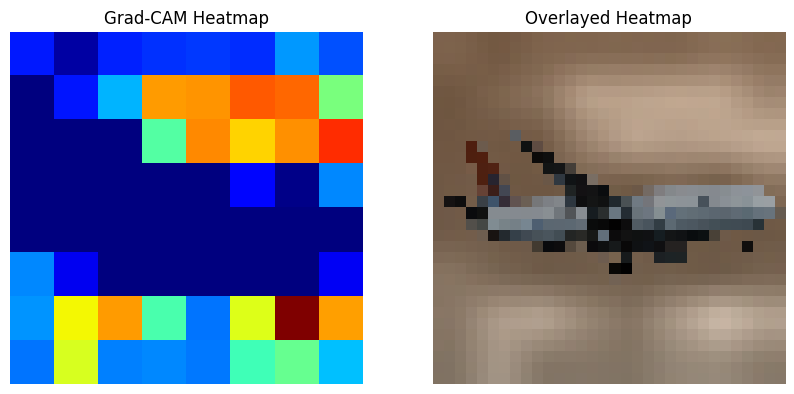

In [8]:
# Generate explanation
heatmap, overlayed_image = explainer.execute_explanation(model, image)

# Display results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Grad-CAM Heatmap")
plt.imshow(heatmap, cmap='jet')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Overlayed Heatmap")
plt.imshow(overlayed_image)
plt.axis('off')

plt.show()

### Saliency Maps

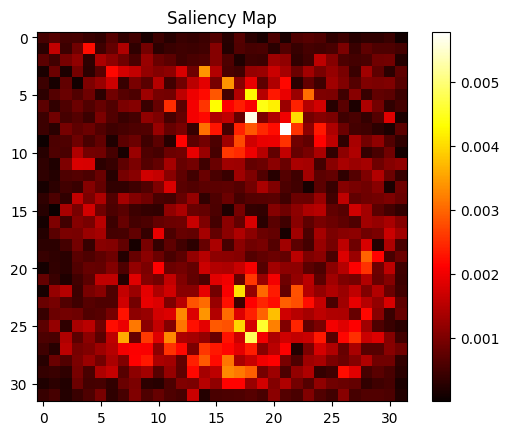

In [9]:
# Use the Saliency Map Strategy
saliency_strategy = SaliencyMap()
context = ExplainabilityContext(saliency_strategy)
saliency_map = context.execute_explanation(model, image)

# Visualize
plt.imshow(saliency_map, cmap='hot')
plt.colorbar()
plt.title("Saliency Map")
plt.show()

### Integrated Gradients

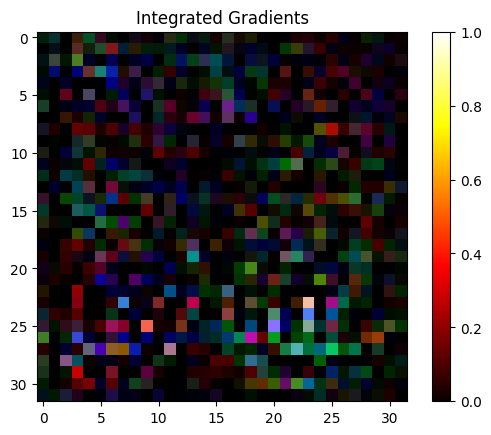

In [10]:
# Use Integrated Gradients Strategy
ig_strategy = IntegratedGradients(steps=50)  # Higher steps for smoother results
context = ExplainabilityContext(ig_strategy)
ig_map = context.execute_explanation(model, image)

# Visualize
plt.imshow(ig_map, cmap='hot')
plt.colorbar()
plt.title("Integrated Gradients")
plt.show()

### SHAP

In [11]:
# Load your image
img = cv2.imread(image_path)

In [12]:
# Preprocess the image (resize, normalize)
img = cv2.resize(img, (32, 32))  # Resize to match your model's input size

In [13]:
# Normalize pixel values
img = img / 255.0

c:\Users\Geeneth\Desktop\Code\Machine Learning\PycharmProjects\Image Classification with Explainability\.venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(1, 32, 32, 3))']
  warnings.warn(msg)
c:\Users\Geeneth\Desktop\Code\Machine Learning\PycharmProjects\Image Classification with Explainability\.venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: input_layer
Received: inputs=['Tensor(shape=(50, 32, 32, 3))']
  warnings.warn(msg)


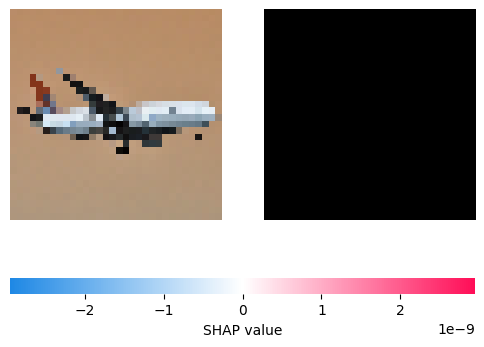

In [14]:
# Explain predictions
explainer = shap.GradientExplainer(model, x_train[:100])  # Use some training samples
shap_values = explainer.shap_values(np.expand_dims(img, axis=0))  # Explain the loaded image

# Visualize
shap.image_plot(shap_values, np.expand_dims(img, axis=0))

### Grad-cam Superimposed image

c:\Users\Geeneth\Desktop\Code\Machine Learning\PycharmProjects\Image Classification with Explainability\.venv\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 32, 32, 3))
  warnings.warn(msg)


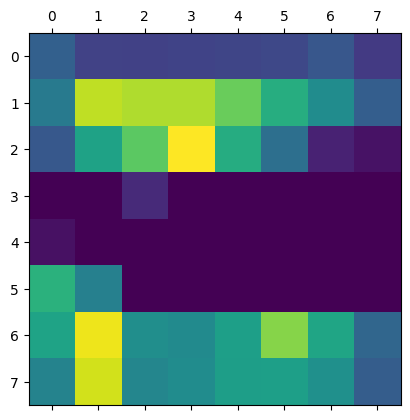

In [15]:
# Use Grad-CAM Strategy
gradcamsuperimposed_strategy = GradCAMSuperimposed(last_conv_layer_name="last_conv")
context = ExplainabilityContext(gradcamsuperimposed_strategy)
heatmap = context.execute_explanation(model, image)

# Display heatmap
plt.matshow(heatmap)
plt.show()

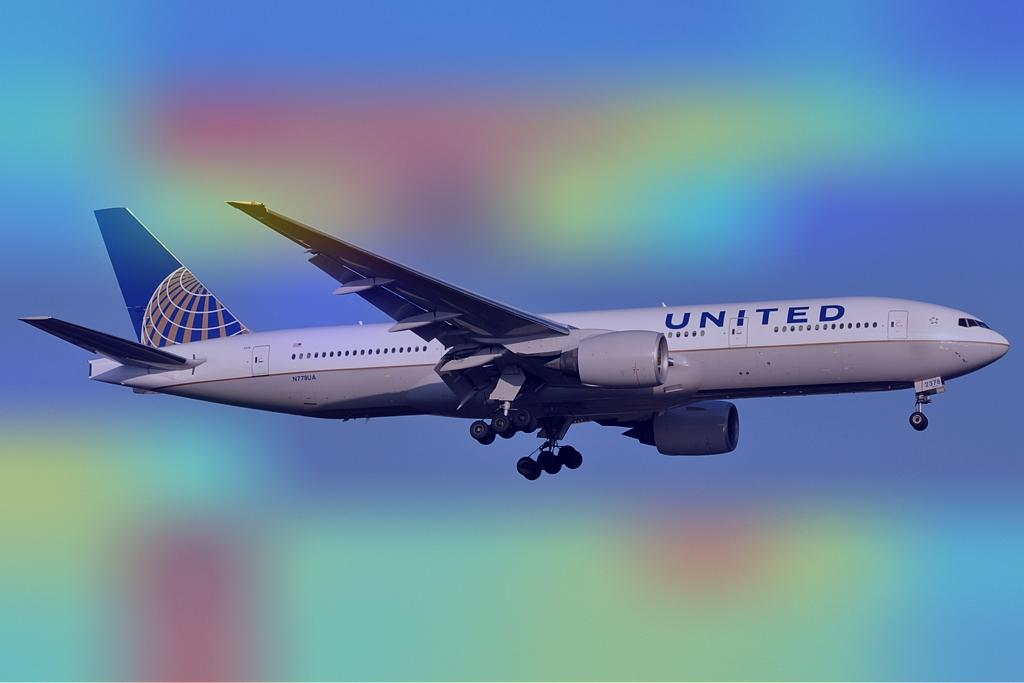

In [16]:
cam_path = GradCAMSuperimposed.save_and_display_gradcam(image_path, heatmap)

# Show the final image
display(Image(cam_path))